In [3]:
import pyspark

In [4]:
from pyspark.sql import SparkSession

# Khởi tạo SparkSession
spark = SparkSession.builder \
    .appName("MLLib") \
    .getOrCreate()

24/05/20 00:53:26 WARN Utils: Your hostname, godwolf-2-7 resolves to a loopback address: 127.0.1.1; using 10.0.2.15 instead (on interface enp0s3)
24/05/20 00:53:26 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/05/20 00:53:27 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
24/05/20 00:53:28 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.


# Bài tập 1: Thao tác với dữ liệu đầu vào

In [5]:
# Sử dụng biến SparkSession để đọc dữ liệu đầu vào từ tập tin csv.
data = spark.read.format("csv")\
.option("header", "true")\
.option("inferSchema", "true")\
.load("/home/godwolf/Downloads/spark-3.5.1-bin-hadoop3/python/TH4/TH5_Attachments/data_geo.csv")

In [6]:
data.cache()

DataFrame[2014 rank: int, City: string, State: string, State Code: string, 2014 Population estimate: int, 2015 median sales price: double]

In [7]:
data.count()

294

In [8]:
# Hiển thị thông tin dữ liệu
display(data)

DataFrame[2014 rank: int, City: string, State: string, State Code: string, 2014 Population estimate: int, 2015 median sales price: double]

In [9]:
data.printSchema()

root
 |-- 2014 rank: integer (nullable = true)
 |-- City: string (nullable = true)
 |-- State: string (nullable = true)
 |-- State Code: string (nullable = true)
 |-- 2014 Population estimate: integer (nullable = true)
 |-- 2015 median sales price: double (nullable = true)



In [10]:
# Loại bỏ các dòng có giá trị trống
data = data.dropna()
data.count()

109

In [11]:
# Tạo View để truy vấn hiển thị dữ liệu
data.createOrReplaceTempView("data_geo")

In [12]:
df1 = spark.sql("SELECT City, `State Code`, `2014 Population estimate`/1000 as `2014 Pop estimate`, `2015 median sales price` FROM data_geo")
df1.show()

+-----------------+----------+-----------------+-----------------------+
|             City|State Code|2014 Pop estimate|2015 median sales price|
+-----------------+----------+-----------------+-----------------------+
|       Birmingham|        AL|          212.247|                  162.9|
|       Huntsville|        AL|          188.226|                  157.7|
|           Mobile|        AL|          194.675|                  122.5|
|       Montgomery|        AL|          200.481|                  129.0|
|          Phoenix|        AZ|         1537.058|                  206.1|
|           Tucson|        AZ|          527.972|                  178.1|
|      Little Rock|        AR|          197.706|                  131.8|
|          Anaheim|        CA|          346.997|                  685.7|
|      Los Angeles|        CA|         3928.864|                  434.7|
|        Riverside|        CA|          319.504|                  281.0|
|       Sacramento|        CA|          485.199|   

In [13]:
# Tiền xử lý dữ liệu
df2 = spark.sql("SELECT `2014 Population estimate`,`2015 median sales price` as label FROM data_geo")
df2.show()

+------------------------+-----+
|2014 Population estimate|label|
+------------------------+-----+
|                  212247|162.9|
|                  188226|157.7|
|                  194675|122.5|
|                  200481|129.0|
|                 1537058|206.1|
|                  527972|178.1|
|                  197706|131.8|
|                  346997|685.7|
|                 3928864|434.7|
|                  319504|281.0|
|                  485199|275.8|
|                 1381069|510.3|
|                  852469|748.3|
|                 1015785|900.0|
|                  105112|442.2|
|                  445830|220.1|
|                  663862|338.1|
|                  147612|342.7|
|                  124705|202.6|
|                  130282|205.1|
+------------------------+-----+
only showing top 20 rows



In [14]:
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler

In [15]:
assembler = VectorAssembler(
    inputCols=["2014 Population estimate"],
    outputCol="features")
data = assembler.transform(df2)
display(data.select("features","label"))

data.show()

DataFrame[features: vector, label: double]

+------------------------+-----+-----------+
|2014 Population estimate|label|   features|
+------------------------+-----+-----------+
|                  212247|162.9| [212247.0]|
|                  188226|157.7| [188226.0]|
|                  194675|122.5| [194675.0]|
|                  200481|129.0| [200481.0]|
|                 1537058|206.1|[1537058.0]|
|                  527972|178.1| [527972.0]|
|                  197706|131.8| [197706.0]|
|                  346997|685.7| [346997.0]|
|                 3928864|434.7|[3928864.0]|
|                  319504|281.0| [319504.0]|
|                  485199|275.8| [485199.0]|
|                 1381069|510.3|[1381069.0]|
|                  852469|748.3| [852469.0]|
|                 1015785|900.0|[1015785.0]|
|                  105112|442.2| [105112.0]|
|                  445830|220.1| [445830.0]|
|                  663862|338.1| [663862.0]|
|                  147612|342.7| [147612.0]|
|                  124705|202.6| [124705.0]|
|         

In [16]:
pip install pandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [17]:
pip install ggplot

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [18]:
# Trực quan hóa dữ liệu
import numpy as np
import matplotlib.pyplot as plt

In [19]:
x = data.rdd.map(lambda p: (p.features[0])).collect()
y = data.rdd.map(lambda p: (p.label)).collect()

In [20]:
from pandas import *
from ggplot import *

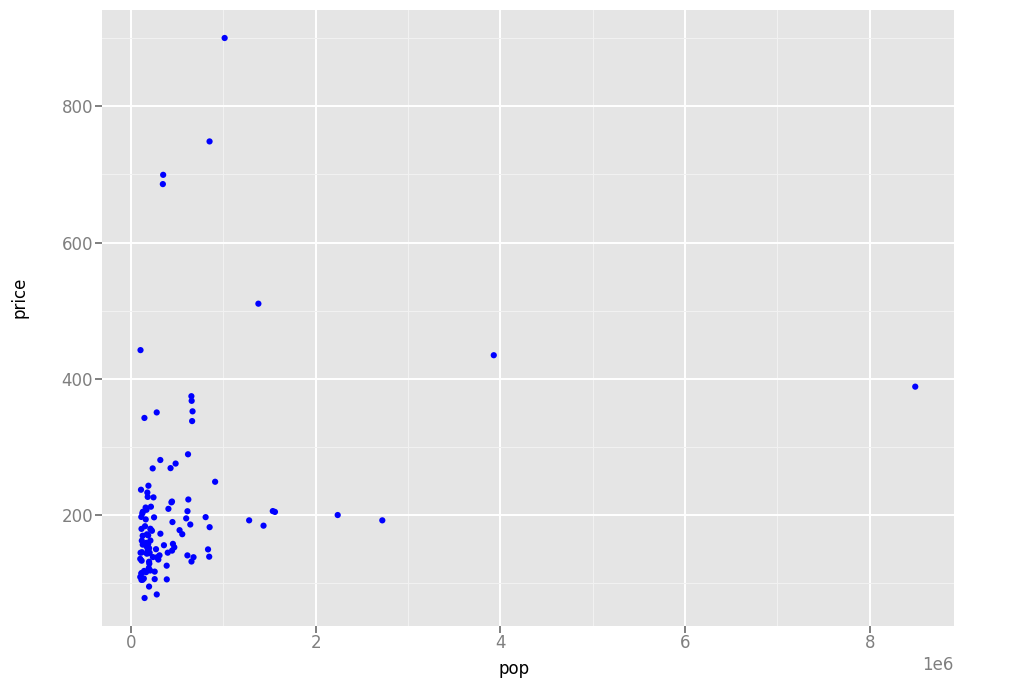

<ggplot: (8776625430737)>

In [21]:
pydf = DataFrame({'pop':x,'price':y})
p = ggplot(pydf, aes('pop','price')) + \
geom_point(color='blue')
display(p)

# Bài tập 2: Sử dụng mô hình hồi quy tuyến tính để dự báo kết quả giá bán

In [22]:
# Thêm lớp LinearRegression từ thư viện máy học
from pyspark.ml.regression import LinearRegression

In [23]:
# Tạo biến LinearRegression để sử dụng
lr = LinearRegression()

In [24]:
# Tạo ra hai mô hình tương ứng với hai tham số
modelA = lr.fit(data, {lr.regParam:0.0})
modelB = lr.fit(data, {lr.regParam:100.0})

24/05/20 00:54:50 WARN Instrumentation: [b215987f] regParam is zero, which might cause numerical instability and overfitting.


In [25]:
# Hiển thị thông tin của hai mô hình
print(">>>> ModelA intercept: {}, coefficient: {}".format(modelA.intercept, modelA.coefficients[0]))
print(">>>> ModelB intercept: {}, coefficient: {}".format(modelB.intercept, modelB.coefficients[0]))

>>>> ModelA intercept: 191.29427575139394, coefficient: 3.779789682338248e-05
>>>> ModelB intercept: 199.85112564667153, coefficient: 2.1603499483717156e-05


In [26]:
# Hiển thị thông tin của hai mô hình
predictionsA = modelA.transform(data)
predictionsA.show()

predictionsB = modelB.transform(data)
predictionsB.show()

+------------------------+-----+-----------+------------------+
|2014 Population estimate|label|   features|        prediction|
+------------------------+-----+-----------+------------------+
|                  212247|162.9| [212247.0]| 199.3167659584664|
|                  188226|157.7| [188226.0]|198.40882267887193|
|                  194675|122.5| [194675.0]|198.65258131548592|
|                  200481|129.0| [200481.0]|198.87203590444247|
|                 1537058|206.1|[1537058.0]|249.39183544694856|
|                  527972|178.1| [527972.0]|211.25050693302884|
|                  197706|131.8| [197706.0]| 198.7671467407576|
|                  346997|685.7| [346997.0]| 204.4100325554172|
|                 3928864|434.7|[3928864.0]|339.79707185649573|
|                  319504|281.0| [319504.0]|203.37085497805194|
|                  485199|275.8| [485199.0]|209.63377749220228|
|                 1381069|510.3|[1381069.0]|243.49577931936597|
|                  852469|748.3| [852469

# Bài tập 3: Đánh giá mô hình dự đoán

In [27]:
# Thêm lớp RegressionEvaluator từ thư viện máy học
from pyspark.ml.evaluation import RegressionEvaluator

In [28]:
# Sử dụng phương pháp tính Root Mean Squared Error để đánh giá kết quả mô hình
evaluator = RegressionEvaluator(metricName="rmse")

RMSEA = evaluator.evaluate(predictionsA)
print("ModelA: Root Mean Squared Error = " + str(RMSEA))

RMSEB = evaluator.evaluate(predictionsB)
print("ModelB: Root Mean Squared Error = " + str(RMSEB))

ModelA: Root Mean Squared Error = 128.60202684284758
ModelB: Root Mean Squared Error = 129.49630019270606


# Bài tập 4: Trực quan hóa kết quả

In [29]:
# Lấy ra các thông tin cần thiết
pop = data.rdd.map(lambda p: (p.features[0])).collect()
price = data.rdd.map(lambda p: (p.label)).collect()

predA = predictionsA.select("prediction").rdd.map(lambda r: r[0]).collect()
predB = predictionsB.select("prediction").rdd.map(lambda r: r[0]).collect()

In [30]:
pydf = DataFrame({'pop':pop,'price':price,'predA':predA,
'predB':predB})
pydf

,pop,price,predA,predB
0,212247.0,162.9,199.316766,204.436404
1,188226.0,157.7,198.408823,203.917466
2,194675.0,122.5,198.652581,204.056787
3,200481.0,129.0,198.872036,204.182217
4,1537058.0,206.1,249.391835,233.056957
...,...,...,...,...
104,450980.0,190.0,208.340371,209.593872
105,668342.0,352.4,216.556198,214.289652
106,212052.0,180.2,199.309395,204.432191
107,245691.0,226.2,200.580879,205.158911


In [31]:
pip install plotnine

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [32]:
from plotnine import *

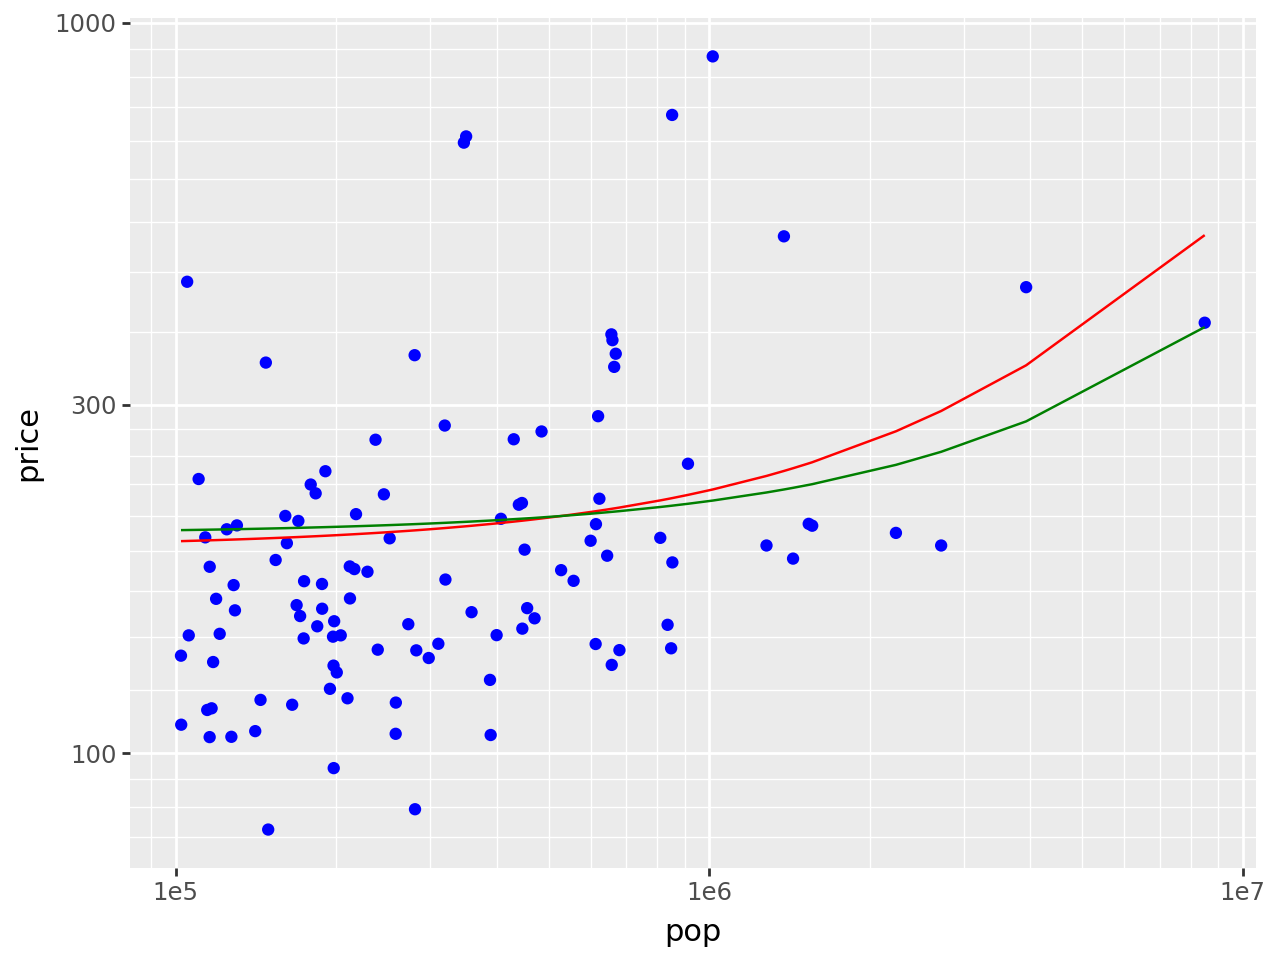

In [33]:
p = ggplot(pydf, aes(x='pop', y='price')) + \
    geom_point(color='blue') + \
    geom_line(aes(x='pop', y='predA'), color='red') + \
    geom_line(aes(x='pop', y='predB'), color='green') + \
    scale_x_log10() + scale_y_log10()

display(p)